In [97]:
print("SUPERVISED CLASSIFICATION AND REGRESSION MODELS")

SUPERVISED CLASSIFICATION AND REGRESSION MODELS


In [63]:
import pandas as pd
import numpy as np
import os

In [6]:
pwd

'C:\\Users\\monis\\PycharmProjects'

In [7]:
dyear=pd.read_csv('C:/Users/monis/housing_in_london_yearly_variables.csv',parse_dates=True,index_col='date')
dyear.index.name='Date'
dyear.head()

,code,area,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
Date,,,,,,,,,,,
1999-01-12,E09000001,city of london,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1999-01-12,E09000002,barking and dagenham,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
1999-01-12,E09000003,barnet,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
1999-01-12,E09000004,bexley,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
1999-01-12,E09000005,brent,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [8]:
dyear.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 1999-01-12 to 2019-01-12
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   median_salary      1049 non-null   float64
 3   life_satisfaction  352 non-null    float64
 4   mean_salary        1071 non-null   object 
 5   recycling_pct      860 non-null    object 
 6   population_size    1018 non-null   float64
 7   number_of_jobs     931 non-null    float64
 8   area_size          666 non-null    float64
 9   no_of_houses       666 non-null    float64
 10  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 100.4+ KB


In [9]:
print(pd.unique(dyear['mean_salary']))
print('\n')
print(pd.unique(dyear['recycling_pct']))
dyear['mean_salary']=pd.to_numeric(dyear['mean_salary'],errors='coerce')
dyear['recycling_pct']=pd.to_numeric(dyear['recycling_pct'],errors='coerce')

['48922' '23620' '23128' ... '32083' '34916' '31251']


['0' '3' '8' '18' '6' '13' '12' '9' '4' '2' '7' '5' '10' '11' '14' 'na'
 '27' '15' nan '17' '16' '1' '20' '25' '19' '23' '28' '21' '34' '24' '30'
 '26' '38' '22' '29' '32' '31' '40' '36' '33' '37' '42' '41' '35' '51'
 '43' '44' '46' '39' '50' '47' '49' '54' '48' '45' '55' '52' '53']


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dyear['area_n']=encoder.fit_transform(dyear['area'])
dyear['code_n']=encoder.fit_transform(dyear['code'])
dyear.drop(['area','code'],axis=1,inplace=True)

In [29]:
dyear.info()
dyear.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 1999-01-12 to 2019-01-12
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_salary      1049 non-null   float64
 1   life_satisfaction  352 non-null    float64
 2   mean_salary        1054 non-null   float64
 3   recycling_pct      859 non-null    float64
 4   population_size    1018 non-null   float64
 5   number_of_jobs     931 non-null    float64
 6   area_size          666 non-null    float64
 7   no_of_houses       666 non-null    float64
 8   borough_flag       1071 non-null   int64  
 9   area_n             1071 non-null   int32  
 10  code_n             1071 non-null   int32  
dtypes: float64(8), int32(2), int64(1)
memory usage: 92.0 KB


,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,area_n,code_n
Date,,,,,,,,,,,
1999-01-12,33020.0,NaN,48922.0,0.0,6581.0,NaN,NaN,NaN,1,6,0
1999-01-12,21480.0,NaN,23620.0,3.0,162444.0,NaN,NaN,NaN,1,0,1
1999-01-12,19568.0,NaN,23128.0,8.0,313469.0,NaN,NaN,NaN,1,1,2
1999-01-12,18621.0,NaN,21386.0,18.0,217458.0,NaN,NaN,NaN,1,2,3
1999-01-12,18532.0,NaN,20911.0,6.0,260317.0,NaN,NaN,NaN,1,3,4


In [11]:
dyear.describe()

,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,area_n,code_n
count,1049.000000,352.000000,1054.000000,859.000000,1.018000e+03,9.310000e+02,6.660000e+02,6.660000e+02,1071.000000,1071.000000,1071.000000
mean,27977.792183,7.485057,34474.205882,26.890570,6.042576e+06,3.188095e+06,3.724903e+05,8.814682e+05,0.647059,25.000000,25.000000
std,6412.807487,0.198451,11002.763303,12.903159,1.526810e+07,8.058302e+06,2.157060e+06,3.690376e+06,0.478108,14.726478,14.726478
min,15684.000000,7.000000,18351.000000,0.000000,6.581000e+03,4.700000e+04,3.150000e+02,5.009000e+03,0.000000,0.000000,0.000000
25%,23857.000000,7.350000,28398.750000,17.000000,2.243458e+05,9.450000e+04,2.960000e+03,8.763550e+04,0.000000,12.000000,12.000000
50%,27441.000000,7.510000,32374.500000,27.000000,2.946035e+05,1.570000e+05,4.323000e+03,1.024020e+05,1.000000,25.000000,25.000000
75%,30932.000000,7.640000,37159.250000,37.000000,4.630098e+06,2.217000e+06,8.220000e+03,1.262760e+05,1.000000,38.000000,38.000000
max,61636.000000,7.960000,90842.000000,55.000000,6.643555e+07,3.575000e+07,1.330373e+07,2.417217e+07,1.000000,50.000000,50.000000


In [12]:
dyear.isnull().sum()

median_salary         22
life_satisfaction    719
mean_salary           17
recycling_pct        212
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
area_n                 0
code_n                 0
dtype: int64

In [15]:
nullcol=['median_salary','life_satisfaction','mean_salary','recycling_pct','population_size','number_of_jobs',
         'area_size','no_of_houses']
for col in nullcol:
    mean_of_col=dyear[col].mean()
    dyear=dyear.fillna({col:mean_of_col})
        

In [16]:
dyear.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 1999-01-12 to 2019-01-12
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_salary      1071 non-null   float64
 1   life_satisfaction  1071 non-null   float64
 2   mean_salary        1071 non-null   float64
 3   recycling_pct      1071 non-null   float64
 4   population_size    1071 non-null   float64
 5   number_of_jobs     1071 non-null   float64
 6   area_size          1071 non-null   float64
 7   no_of_houses       1071 non-null   float64
 8   borough_flag       1071 non-null   int64  
 9   area_n             1071 non-null   int32  
 10  code_n             1071 non-null   int32  
dtypes: float64(8), int32(2), int64(1)
memory usage: 92.0 KB


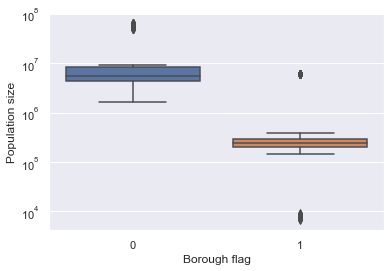

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
_=sns.boxplot(x='borough_flag',y='population_size',data=dyear)
plt.xlabel('Borough flag')
plt.ylabel('Population size')
plt.yscale('log')
plt.show()

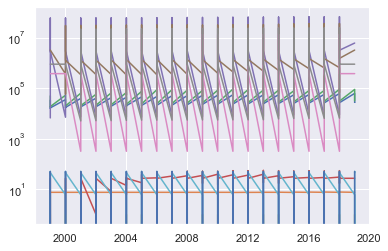

In [18]:
plt.plot(dyear)
plt.yscale('log')
plt.show()

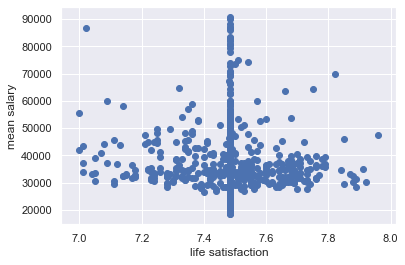

In [19]:
plt.figure()
plt.scatter(dyear['life_satisfaction'],dyear['mean_salary'])
plt.xlabel('life satisfaction')
plt.ylabel('mean salary')
plt.show()

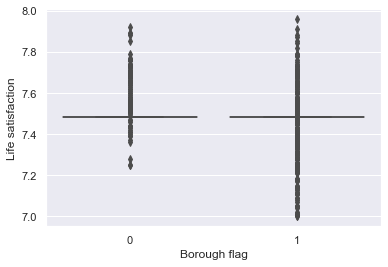

In [20]:
_=sns.boxplot(x='borough_flag',y='life_satisfaction',data=dyear)
plt.xlabel('Borough flag')
plt.ylabel('Life satisfaction')
#plt.yscale('log')
plt.show()

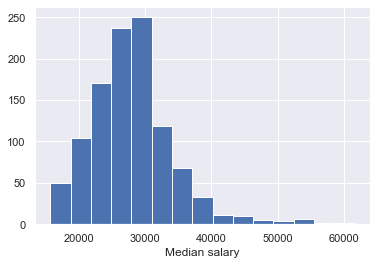

In [27]:
plt.hist(dyear['median_salary'],bins=15)
plt.xlabel('Median salary')
plt.show()

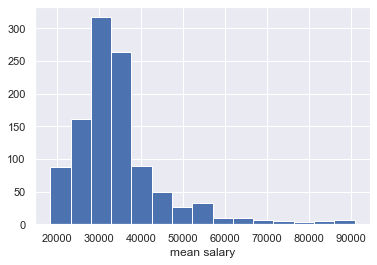

In [28]:
plt.hist(dyear['mean_salary'],bins=15)
plt.xlabel('mean salary')
plt.show()

In [30]:
dyear.head()

,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,area_n,code_n
Date,,,,,,,,,,,
1999-01-12,33020.0,7.485057,48922.0,0.0,6581.0,3.188095e+06,372490.27027,881468.15015,1,6,0
1999-01-12,21480.0,7.485057,23620.0,3.0,162444.0,3.188095e+06,372490.27027,881468.15015,1,0,1
1999-01-12,19568.0,7.485057,23128.0,8.0,313469.0,3.188095e+06,372490.27027,881468.15015,1,1,2
1999-01-12,18621.0,7.485057,21386.0,18.0,217458.0,3.188095e+06,372490.27027,881468.15015,1,2,3
1999-01-12,18532.0,7.485057,20911.0,6.0,260317.0,3.188095e+06,372490.27027,881468.15015,1,3,4


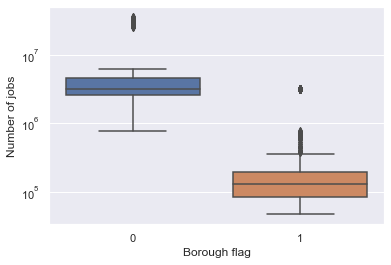

In [31]:
_=sns.boxplot(x='borough_flag',y='number_of_jobs',data=dyear)
plt.xlabel('Borough flag')
plt.ylabel('Number of jobs')
plt.yscale('log')
plt.show()

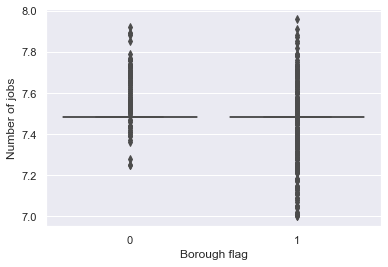

In [32]:
_=sns.boxplot(x='borough_flag',y='life_satisfaction',data=dyear)
plt.xlabel('Borough flag')
plt.ylabel('Number of jobs')
#plt.yscale('log')
plt.show()

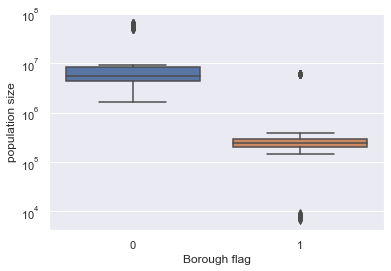

In [33]:
_=sns.boxplot(x='borough_flag',y='population_size',data=dyear)
plt.xlabel('Borough flag')
plt.ylabel('population size')
plt.yscale('log')
plt.show()

In [34]:
rols0=dyear[dyear['borough_flag']==0]
rols1=dyear[dyear['borough_flag']==1]



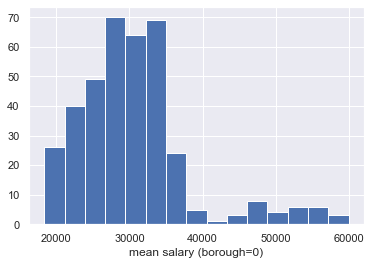

The maximum mean salary in borough=0 is : 59987.0
The minimum mean salary in borough=0 is : 18351.0


In [35]:
plt.hist(rols0['mean_salary'],bins=15)
plt.xlabel('mean salary (borough=0)')
plt.show()
print('The maximum mean salary in borough=0 is : {}'.format(rols0['mean_salary'].max()))
print('The minimum mean salary in borough=0 is : {}'.format(rols0['mean_salary'].min()))

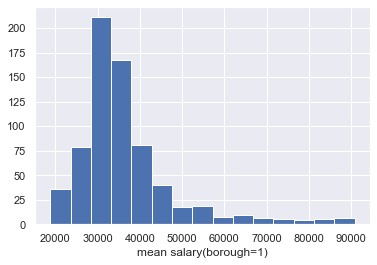

The maximum mean salary in borough=1 is : 90842.0
The minimum mean salary in borough=1 is : 18786.0


In [36]:
plt.hist(rols1['mean_salary'],bins=15)
plt.xlabel('mean salary(borough=1)')
plt.show()
print('The maximum mean salary in borough=1 is : {}'.format(rols1['mean_salary'].max()))
print('The minimum mean salary in borough=1 is : {}'.format(rols1['mean_salary'].min()))

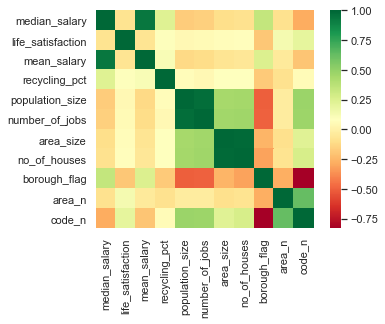

In [42]:
sns.heatmap(dyear.corr(),square=True,cmap='RdYlGn')

In [47]:
X=dyear.drop('borough_flag',axis=1).values
y=dyear['borough_flag']

In [48]:
print(type(X))
print(type(y))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21,stratify=y)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [96]:
print('\n Supervised classification model to predict borough flag \n')


 Supervised classification model to predict borough flag 



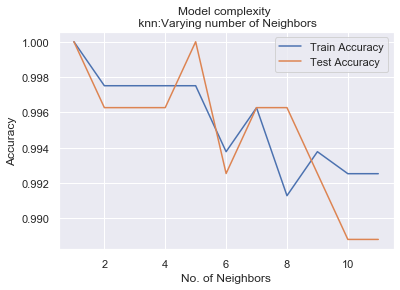

In [64]:
from sklearn.neighbors import KNeighborsClassifier
# Plotting Model complexity and overfitting/underfitting
neighbors=np.arange(1,12)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)
plt.title('Model complexity \n knn:Varying number of Neighbors')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.plot(neighbors,test_accuracy,label='Test Accuracy')
plt.legend()
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy')
plt.show()
    

The best parameters for knn is {'n_neighbors': 3}
The best score for knn is 0.9974999999999999
R2 :0.996268656716418
The confusion matrics is 
 [[ 94   1]
 [  0 173]]
Classification report is 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.99      1.00      1.00       173

    accuracy                           1.00       268
   macro avg       1.00      0.99      1.00       268
weighted avg       1.00      1.00      1.00       268



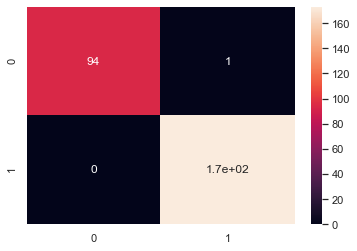

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
print('The best parameters for knn is {}'.format(knn_cv.best_params_))
print('The best score for knn is {}'.format(knn_cv.best_score_))
y_pred=knn_cv.predict(X_test)
r2=knn_cv.score(X_test,y_test)
print('R2 :{}'.format(r2))
cm=confusion_matrix(y_test,y_pred)
print('The confusion matrics is \n {}'.format(cm))
print('Classification report is \n {}'.format(classification_report(y_test,y_pred)))
sns.heatmap(cm,annot=True)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
c_space=np.logspace(-5,8,15)
param_grid={'C':c_space}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,cv=5)
logreg_cv.fit(X_train,y_train)
print('Tuned Logistic Regression parameters:{}'.format(logreg_cv.best_params_))
print('Best score is {}'.format(logreg_cv.best_score_))
y_pred2=logreg_cv.predict(X_test)
print('Score {}'.format(logreg_cv.score(X_test,y_test)))

Tuned Logistic Regression parameters:{'C': 31.622776601683793}
Best score is 1.0
Score 1.0


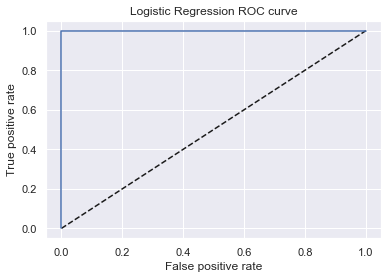

ROC AUC score is 1.0
AUC scoress computed using 5 fold cross valdation is: [1. 1. 1. 1. 1.]


In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred_prob=logreg_cv.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.show()
print('ROC AUC score is {}'.format(roc_auc_score(y_test,y_pred_prob)))
cv_score=cross_val_score(logreg_cv,X_train,y_train,cv=5,scoring='roc_auc')
print('AUC scoress computed using 5 fold cross valdation is: {}'.format(cv_score))

In [95]:
print('\n')
print('Supervised regression models to predict life satisfaction')



Supervised regression models to predict life satisfaction


In [88]:
X=dyear.drop('life_satisfaction',axis=1).values
y=dyear['life_satisfaction']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21,stratify=y)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [90]:
from sklearn.linear_model import Ridge
alpha_space=np.logspace(-4,0,50)
ridge=Ridge(normalize=True)
param_grid={'alpha':alpha_space}
ridge_cv=GridSearchCV(ridge,param_grid,cv=5)
ridge_cv.fit(X_train,y_train)
print('Tuned Ridge Regression parameter:{}'.format(logreg_cv.best_params_))
print('Best score is {}'.format(logreg_cv.best_score_))
y_pred2=ridge_cv.predict(X_test)
print(ridge_cv.score(X_test,y_test))

Tuned Ridge Regression parameter:{'C': 31.622776601683793}
Best score is 1.0
0.8028176676278947


In [92]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor()
param_grid={'n_neighbors':np.arange(1,50)}
knnr_cv=GridSearchCV(knnr,param_grid,cv=5)
knnr_cv.fit(X_train,y_train)
#y_pred=knnr.predict(X_test)
print('Tuned KNeighborsRegressor best parameters are:{}'.format(knnr_cv.best_params_))
print('Tuned KNeighborsRegressor best score is:{}'.format( knnr_cv.best_score_))
r2=knnr_cv.score(X_test,y_test)
print('R2 :{}'.format(r2))

Tuned KNeighborsRegressor best parameters are:{'n_neighbors': 3}
Tuned KNeighborsRegressor best score is:0.9867056245482649
R2 :0.9873170401920022
